http://basemaptutorial.readthedocs.io/en/latest/shapefile.html

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.mlab as mlab
import matplotlib.path as mpath

/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWar

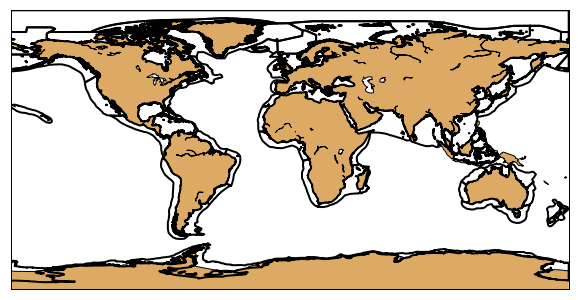

In [3]:
ax = plt.figure(figsize=(10,12), facecolor = 'w')
m = Basemap(projection='cyl',lon_0=0)
m.drawcoastlines()
m.drawmapboundary()

m.fillcontinents(color='#ddaa66')

m.readshapefile('../Data/LME66/LMEs66', 'LME') # the second argment is a name for the shapefile data
for info, shape in zip(m.LME_info, m.LME):
        x, y = zip(*shape) 
        m.plot(x, y, marker=None,color='k', linewidth = '2')       
plt.show()


In [4]:
help(m.readshapefile)

Help on method readshapefile in module mpl_toolkits.basemap:

readshapefile(self, shapefile, name, drawbounds=True, zorder=None, linewidth=0.5, color='k', antialiased=1, ax=None, default_encoding='utf-8') method of mpl_toolkits.basemap.Basemap instance
    Read in shape file, optionally draw boundaries on map.
    
    .. note::
      - Assumes shapes are 2D
      - only works for Point, MultiPoint, Polyline and Polygon shapes.
      - vertices/points must be in geographic (lat/lon) coordinates.
    
    Mandatory Arguments:
    
    .. tabularcolumns:: |l|L|
    
    ==============   ====================================================
    Argument         Description
    ==============   ====================================================
    shapefile        path to shapefile components.  Example:
                     shapefile='/home/jeff/esri/world_borders' assumes
                     that world_borders.shp, world_borders.shx and
                     world_borders.dbf live in /h

http://basemaptutorial.readthedocs.io/en/latest/shapefile.html#fillingpolygons

In [5]:
m.LME_info
# this gives a separate entry for each ring in the shape. 
#Are these separate polygons or islands in the LME?

[{'ARCTIC': '               ',
  'GROUPING': '                         ',
  'LME_NAME': 'Baltic Sea',
  'LME_NUMBER': '2.30000000000e+001',
  'OBJECTID': 1,
  'RINGNUM': 1,
  'SHAPENUM': 1,
  'SUM_GIS_KM': '3.95147231641e+005',
  'Shape_Area': '6.19500208262e+001',
  'Shape_Leng': '2.19326402059e+002',
  'USLMES': '          '},
 {'ARCTIC': '               ',
  'GROUPING': '                         ',
  'LME_NAME': 'Baltic Sea',
  'LME_NUMBER': '2.30000000000e+001',
  'OBJECTID': 1,
  'RINGNUM': 2,
  'SHAPENUM': 1,
  'SUM_GIS_KM': '3.95147231641e+005',
  'Shape_Area': '6.19500208262e+001',
  'Shape_Leng': '2.19326402059e+002',
  'USLMES': '          '},
 {'ARCTIC': '               ',
  'GROUPING': '                         ',
  'LME_NAME': 'Baltic Sea',
  'LME_NUMBER': '2.30000000000e+001',
  'OBJECTID': 1,
  'RINGNUM': 3,
  'SHAPENUM': 1,
  'SUM_GIS_KM': '3.95147231641e+005',
  'Shape_Area': '6.19500208262e+001',
  'Shape_Leng': '2.19326402059e+002',
  'USLMES': '          '},
 {'ARCT

In [6]:
m.LME?
# this is a list of points

In [7]:
m.LME[0][:]

[(10.979439735542712, 54.38055038418429),
 (10.986109733640149, 54.378051758220124),
 (11.00304985081658, 54.37694168097261),
 (11.013330459587735, 54.37748718273588),
 (11.017781257370757, 54.380268096891825),
 (10.994999885333357, 54.381938934699576),
 (10.979439735542712, 54.38055038418429),
 (10.969440459883344, 54.38055038418429),
 (10.951669692907785, 54.384719848855525),
 (10.936670303677317, 54.38360977160801),
 (10.913889884921275, 54.36888885474599),
 (10.885279655177044, 54.361938476818125),
 (10.868330001589811, 54.35110092151149),
 (10.843050002688926, 54.3386116030174),
 (10.82750034348976, 54.326938628806886),
 (10.787779808456605, 54.3097190859807),
 (10.765000342981864, 54.30665969855704),
 (10.731670379497075, 54.308609008733185),
 (10.706669807145204, 54.306938171824754),
 (10.690549850075797, 54.308330535465416),
 (10.679160118237746, 54.312488556263816),
 (10.673609733798685, 54.32221984834763),
 (10.660829543983311, 54.325550079190975),
 (10.652219772120588, 54.33

In [8]:
i = 0
for shape in m.LME:
    print 'i = ', i
    print len(shape)
    i = i+1 
# I'm not following how there are 1626 shapes in this dataset. Maybe there are a number of shapes,
# i.e. multiple polygons for some of the LME's

i =  0
11613
i =  1
69
i =  2
418
i =  3
82
i =  4
77
i =  5
187
i =  6
377
i =  7
70
i =  8
351
i =  9
54
i =  10
184
i =  11
47
i =  12
62
i =  13
53
i =  14
313
i =  15
45
i =  16
57
i =  17
66
i =  18
48
i =  19
159
i =  20
29
i =  21
86
i =  22
66
i =  23
89
i =  24
50
i =  25
29
i =  26
163
i =  27
82
i =  28
59
i =  29
110
i =  30
6453
i =  31
43
i =  32
52
i =  33
170
i =  34
81
i =  35
38
i =  36
36
i =  37
9695
i =  38
62
i =  39
74
i =  40
98
i =  41
38
i =  42
31
i =  43
65
i =  44
54
i =  45
93
i =  46
699
i =  47
71
i =  48
66
i =  49
133
i =  50
130
i =  51
66
i =  52
230
i =  53
90
i =  54
80
i =  55
345
i =  56
59
i =  57
140
i =  58
30
i =  59
34
i =  60
32
i =  61
44
i =  62
31
i =  63
35
i =  64
24
i =  65
50
i =  66
41
i =  67
45
i =  68
48
i =  69
46
i =  70
46
i =  71
32
i =  72
66
i =  73
104
i =  74
12702
i =  75
47
i =  76
28
i =  77
55
i =  78
395
i =  79
688
i =  80
639
i =  81
35
i =  82
339
i =  83
97
i =  84
87
i =  85
167
i =  86
996
i =  87
396
i =  88


42
i =  1061
34
i =  1062
52
i =  1063
46
i =  1064
237
i =  1065
89
i =  1066
43
i =  1067
55
i =  1068
105
i =  1069
204
i =  1070
212
i =  1071
298
i =  1072
51
i =  1073
47
i =  1074
239
i =  1075
40
i =  1076
26
i =  1077
34
i =  1078
40
i =  1079
45
i =  1080
55
i =  1081
38
i =  1082
171
i =  1083
59
i =  1084
55
i =  1085
140
i =  1086
60
i =  1087
102
i =  1088
32
i =  1089
43
i =  1090
102
i =  1091
47
i =  1092
129
i =  1093
38
i =  1094
104
i =  1095
112
i =  1096
3677
i =  1097
58
i =  1098
88
i =  1099
63
i =  1100
48
i =  1101
129
i =  1102
61
i =  1103
34
i =  1104
41
i =  1105
51
i =  1106
68
i =  1107
67
i =  1108
101
i =  1109
69
i =  1110
30
i =  1111
53
i =  1112
27
i =  1113
75
i =  1114
26
i =  1115
33
i =  1116
25
i =  1117
44
i =  1118
47
i =  1119
29
i =  1120
7
i =  1121
4
i =  1122
11622
i =  1123
59
i =  1124
59
i =  1125
20
i =  1126
72
i =  1127
39
i =  1128
25
i =  1129
129
i =  1130
44
i =  1131
23
i =  1132
17
i =  1133
53
i =  1134
96
i =  1135
53
i =

In [9]:
len(m.LME[1][:])

69

IOError: cannot locate LME66/LMEs66.shp

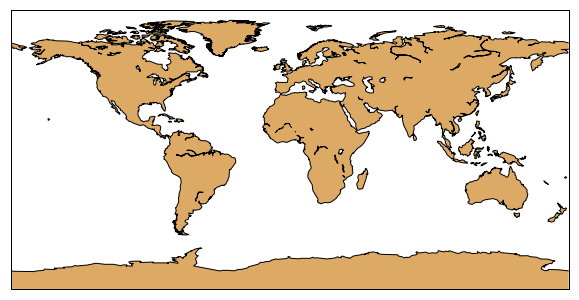

In [10]:
ax = plt.figure(figsize=(10,12), facecolor = 'w')
m = Basemap(projection='cyl',lon_0=0)
m.drawcoastlines()
m.drawmapboundary()

m.fillcontinents(color='#ddaa66')

m.readshapefile('LME66/LMEs66', 'LME', drawbounds = False) # the second argment is a name for the shapefile data

for info, shape in zip(m.LME_info, m.LME):
    #print info,shape
    if info['LME_NAME'] == 'North Sea':
        x, y = zip(*shape) 
        m.plot(x, y, marker=None,color='m')
        
    if info['LME_NAME'] == 'Gulf of Alaska':
        x, y = zip(*shape) 
        m.plot(x, y, marker=None,color='c')
        

# what the heck does the * do here?? Is it grouping all the lat/lon data for the polygons associated with each LME?

In [11]:
# so what were x an y in above?
x?
# is a tuple of length 104
y?
#These are the lon, lat of the points in the LME

In [12]:
# to fill polygons we need the following
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import numpy as np

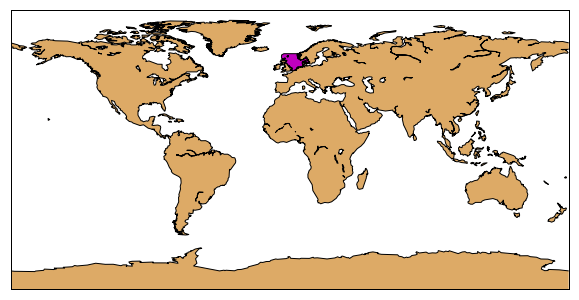

In [14]:
fig = plt.figure(figsize=(10,12), facecolor = 'w')
ax      = fig.add_subplot(111)
m = Basemap(projection='cyl',lon_0=0)
m.drawcoastlines()
m.drawmapboundary()

m.fillcontinents(color='#ddaa66')

m.readshapefile('../Data/LME66/LMEs66', 'LME', drawbounds = False) # the second argment is a name for the shapefile data

patches = []

for info, shape in zip(m.LME_info, m.LME):   
    if info['LME_NAME'] == 'North Sea':
        patches.append(Polygon(np.array(shape), True) )
        
ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))

plt.show()

In [17]:
patches?
# this is a list of 37 for the North Sea. Does this mean there are 37 polygons in the North Sea?
# now it is 6 items for the soctian shelf

IOError: cannot locate LME66/LMEs66.shp

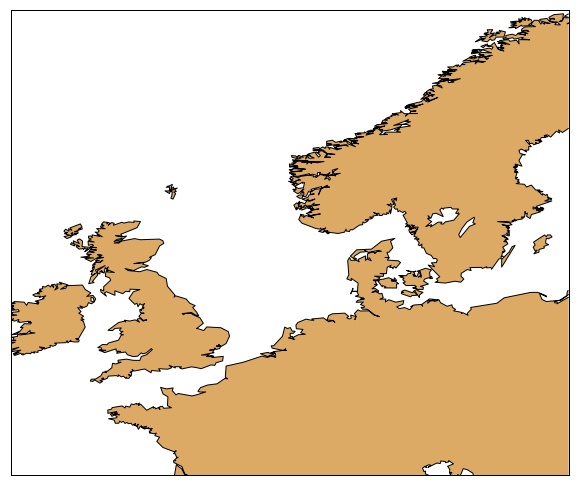

In [15]:
limN, limS, limW, limE = 70,45,-10,20

fig = plt.figure(figsize=(10,12), facecolor = 'w')
ax = fig.add_subplot(111)

m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='l')

m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents(color='#ddaa66')
m.readshapefile('LME66/LMEs66', 'LME', drawbounds = False) # the second argment is a name for the shapefile data
m.drawparallels(np.arange(-90.,120.,10))
m.drawmeridians(np.arange(0.,360.,10))

patches = []

for info, shape in zip(m.LME_info, m.LME):   
    if info['LME_NAME'] == 'North Sea':
        patches.append(Polygon(np.array(shape), True) )
        
ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))

plt.show()


{-10.0: ([<matplotlib.lines.Line2D at 0x115140a90>], []),
 0.0: ([<matplotlib.lines.Line2D at 0x11bb0a510>], []),
 10.0: ([<matplotlib.lines.Line2D at 0x11bb0a090>], []),
 20.0: ([<matplotlib.lines.Line2D at 0x11bb0a850>], [])}

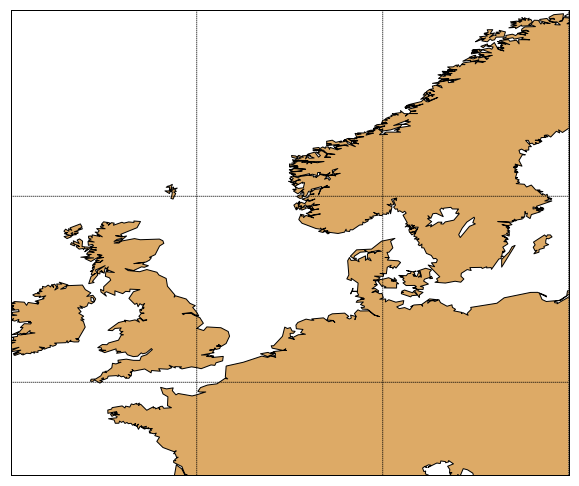

In [17]:
limN, limS, limW, limE = 70,45,-10,20

fig = plt.figure(figsize=(10,12), facecolor = 'w')
ax = fig.add_subplot(111)

m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='l')

m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents(color='#ddaa66')
m.readshapefile('../Data/LME66/LMEs66', 'LME', drawbounds = False) # the second argment is a name for the shapefile data
m.drawparallels(np.arange(-90.,120.,10))
m.drawmeridians(np.arange(0.,360.,10))




Not sure if it's getting the interior islands sorted out with this method. Is this important for extracting the points to make a mask?

Next task: given a polygon (start with a simple one) how to determine if lat/lon points from a numpy array are inside? I.e. make a boolean.

Do I have to do this in basemap, or can I just do it in lat/lon space?

In [20]:
help(Polygon)
# takes xy as argment which is an Nx2 matrix of vertices. Can be closed

Help on class Polygon in module matplotlib.patches:

class Polygon(Patch)
 |  A general polygon patch.
 |  
 |  Method resolution order:
 |      Polygon
 |      Patch
 |      matplotlib.artist.Artist
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xy, closed=True, **kwargs)
 |      *xy* is a numpy array with shape Nx2.
 |      
 |      If *closed* is *True*, the polygon will be closed so the
 |      starting and ending points are the same.
 |      
 |      Valid kwargs are:
 |        agg_filter: unknown
 |        alpha: float or None 
 |        animated: [True | False] 
 |        antialiased or aa: [True | False]  or None for default 
 |        capstyle: ['butt' | 'round' | 'projecting'] 
 |        clip_box: a :class:`matplotlib.transforms.Bbox` instance 
 |        clip_on: [True | False] 
 |        clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
 |        color: ma

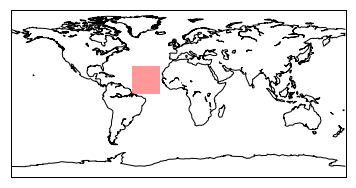

In [24]:
# define a polygon in a map projection

def draw_screen_poly( lats, lons, m):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( xy, facecolor='red', alpha=0.4 )
    plt.gca().add_patch(poly)

################

m = Basemap(projection='cyl',lon_0=0)
    
lats = [ 0, 30, 30, 0 ]
lons = [ -50, -50, -20, -20 ]
x, y = m( lons, lats )
xy = zip(x,y)
poly = Polygon( xy, facecolor='red', alpha=0.4 )
    
m.drawcoastlines()
m.drawmapboundary()
#draw_screen_poly( lats, lons, m )
plt.gca().add_patch(poly)

Now figure out which model grid points are in this polygon

In [19]:
# load in the netcdf file, extract lat/lon array, and find all points that are in this polyton
import netCDF4 as nc
myfile = '../Data/mean.nday1.nc'
mydata = nc.Dataset(myfile,'r')

In [20]:
lat = mydata.variables['TLAT'][:]
lon = mydata.variables['TLONG'][:]

In [21]:
lon[lon>180] = lon[lon>180]-360

In [22]:
sst = mydata.variables['SST'][0,:,:]
sst.shape

(384, 320)

In [25]:
xy

[(-50, 0), (-50, 30), (-20, 30), (-20, 0)]

In [26]:
# find indices that are within the polygon defined above
# let's start for a single point that is definately in the polygon, and one that isn't

mlab.inside_poly([(-30,10), (-60,0)],xy)
# this is returning the indices that are in the polygon


[0]

In [27]:
insideBoolean = mlab.inside_poly(zip(lon.flatten(),lat.flatten()),xy)
len(insideBoolean)
# this is not a boolean, maybe these are indices? yes

2506

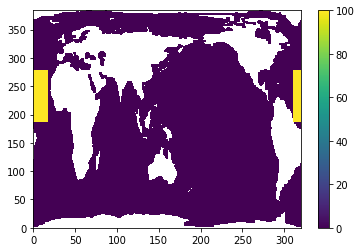

In [28]:
# now the task is to turn those indices into some sort of mask
mask = np.ma.zeros(lon.shape)
mask.ravel()[insideBoolean] = 100
mask = np.ma.masked_where(np.ma.getmask(sst),mask)
plt.pcolormesh(mask)
plt.colorbar()
# BOOOYA!

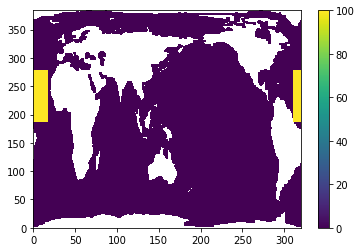

In [29]:
# what the mask should look like if I do it right:
mask_2 = np.ma.zeros(lon.shape)
mask_2[:] = 0
mask_2[(lat>0)&(lat<30)&(lon>-50)&(lon<-20)] = 100
mask_2 = np.ma.masked_where(np.ma.getmask(sst),mask_2)
plt.pcolormesh(mask_2)
plt.colorbar()


Okay, now I need to figure out how to do this for the LMEs. The issue is that they are complicated polygons, so i need to extract them carefully. Plan: adapt Trond's code

I don't think it's going to be easy to get the basemap version to work. And I'd rather keep basemap out of it alltogehter if possible


In [30]:
import ogr

In [32]:
ds = ogr.Open('LME66/LMEs66.shp')

In [33]:
lyr = ds.GetLayer(0)
numberOfPolygons=lyr.GetFeatureCount()
numberOfPolygons
# 66 LMES

66

In [34]:
index = 0
ft = lyr.GetFeature(index)
ft.items()

{'ARCTIC': None,
 'GROUPING': None,
 'LME_NAME': 'Baltic Sea',
 'LME_NUMBER': 23.0,
 'OBJECTID': 1,
 'SUM_GIS_KM': 395147.231641,
 'Shape_Area': 61.9500208262,
 'Shape_Leng': 219.326402059,
 'USLMES': None}

In [35]:
# make array of LME number for mask
LME_num = np.zeros(66)
LME_num
LME_name = []

In [36]:
# keep track of LME number and name
LME_num[index] = ft.items()['LME_NUMBER']
LME_name.append(ft.items()['LME_NAME'])

In [37]:
geom = ft.GetGeometryRef()

"""Create lists to store values for polygons"""
# I think the codes have to do with if the polygons are holes or not
codes = []; all_x = []; all_y = []; all_XY= []

# note there are 30 of these for the first index (Baltic sea)
for i in range(geom.GetGeometryCount()):

    r = geom.GetGeometryRef(i)
    x = [r.GetX(j) for j in range(r.GetPointCount())]
    y = [r.GetY(j) for j in range(r.GetPointCount())]
    
    # I have no idea what the codes bit is for
    codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
    all_x += x
    all_y += y

So now we have a list of all x's and y's (aka lons and lats) for the LME

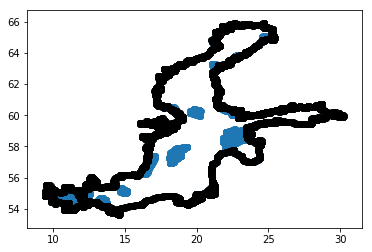

In [38]:
plt.scatter(all_x,all_y)
i = 0
r = geom.GetGeometryRef(i)
x = [r.GetX(j) for j in range(r.GetPointCount())]
y = [r.GetY(j) for j in range(r.GetPointCount())]

plt.scatter(x,y,c = 'k')

# it looks like the first one is always the biggest one, and the others are islands, at least for contiguous LMEs, i.e.
# ogr.wkbPolygon type objects

In [39]:
# can I use the first geometry object, aka polygon, to be the polygon I use to test for points?

inside = mlab.inside_poly(zip(lon.flatten(),lat.flatten()),zip(x,y))
len(inside)

# this takes a while, the polygon has many indices

121

(300, 370)

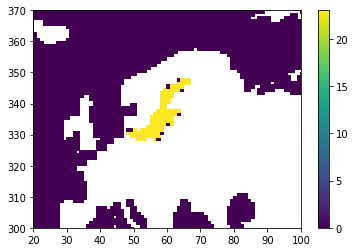

In [40]:
nc

In [41]:
# try with all_x,y
inside2 = mlab.inside_poly(zip(lon.flatten(),lat.flatten()),zip(all_x,all_y))
len(inside2)

94

(300, 370)

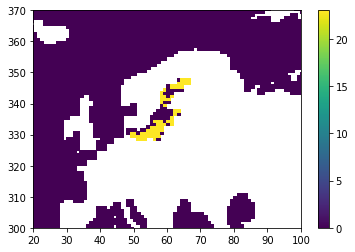

In [42]:
mask = np.ma.zeros(lon.shape)
mask.ravel()[inside2] = ft.items()['LME_NUMBER']
mask = np.ma.masked_where(np.ma.getmask(sst),mask)
plt.pcolormesh(mask)
plt.colorbar()
plt.xlim([20,100])
plt.ylim([300,370])

# this is much worse using all_x,all_y
# maybe I just have to accept this as a mismatch of the LMEs and the model grid.

4
5
5  is a polygon
253
6
6  is a polygon
153
7
7  is a polygon
85
8
8  is a polygon
79
9
9  is a polygon
375
10
10  is a polygon
90
11
11  is a polygon
72
12
12  is a polygon
497
13
13  is a polygon
66
14
14  is a polygon
193
15
15  is a polygon
63
16
16  is a polygon
220
17
17  is a polygon
107
18
18  is a polygon
56
19
19  is a polygon
38
20
20  is a polygon
259
21
21  is a polygon
864
22
22  is a polygon
86
23
23  is a polygon
158
24
24  is a polygon
780
25
25  is a polygon
748
26
26  is a polygon
915
27
27  is a polygon
490
28
28  is a polygon
284
29
29  is a polygon
101
30
30  is a polygon
307
31
31  is a polygon
529
32
32  is a polygon
227
33
33  is a polygon
645
34
34  is a polygon
275
35
35  is a polygon
556
36
36  is a polygon
314
37
37  is a polygon
216
38
38  is a polygon
308
39
39  is a polygon
668
40
40  is a polygon
223
41
41  is a polygon
104
42
42  is a polygon
98
43
43  is a polygon
219
44
44  is a polygon
228
45
45  is a polygon
222
46
46  is a polygon
1774
47
47  is

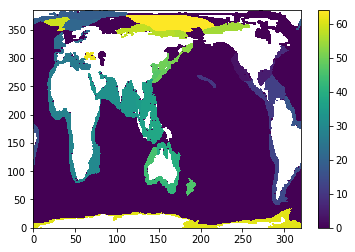

In [43]:
# try looping over the LMEs and see if it works

LME_num = np.zeros(numberOfPolygons)
LME_num
LME_name = []
#mask = np.ma.zeros(lon.shape)
#mask = np.ma.masked_where(np.ma.getmask(sst),mask)

for index in xrange(4,numberOfPolygons):
    
    print index
    ft = lyr.GetFeature(index)
    LME_num[index] = ft.items()['LME_NUMBER']
    LME_name.append(ft.items()['LME_NAME'])

    geom = ft.GetGeometryRef()

    """Create lists to store values for polygons"""
    # I think the codes have to do with if the polygons are holes or not
    codes = []; all_x = []; all_y = []; all_XY= []
    
    """Check if polygon:"""
    if (geom.GetGeometryType() == ogr.wkbPolygon):
        print index, ' is a polygon'
        # note there are 30 of these for the first index (Baltic sea)
        #for i in range(geom.GetGeometryCount()):

        # try doing for just the first polygon
        i = 0
        r = geom.GetGeometryRef(i)
        x = [r.GetX(j) for j in range(r.GetPointCount())]
        y = [r.GetY(j) for j in range(r.GetPointCount())]

        # I have no idea what the code bit is for
        #codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
        #all_x += x
        #all_y += y

        inside = mlab.inside_poly(zip(lon.flatten(),lat.flatten()),zip(x,y))
        print len(inside)

        mask.ravel()[inside] = ft.items()['LME_NUMBER']

plt.pcolormesh(mask)
plt.colorbar()

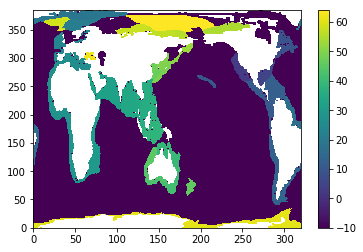

In [50]:
mask1[mask1 == 0] = -100
plt.pcolormesh(mask, vmin = -10)
plt.colorbar()

Need to get code above working for LMEs that are not defined as polygons

Looks like LME 4 is the first one that is not a polygon

In [45]:
# try adding in LME 4 and see if it works


index = 4 
ft = lyr.GetFeature(index)
#print "LME ", ft.items()['LME_NUMBER'], '  ',  ft.items()['LME_NAME']

print index
ft = lyr.GetFeature(index)
LME_num[index] = ft.items()['LME_NUMBER']
LME_name.append(ft.items()['LME_NAME'])

geom = ft.GetGeometryRef()
 
"""Create lists to store values for polygons"""
codes = []; all_x = []; all_y = []; all_XY= []
less_x = []; less_y = []

"""Check if multipolygon:"""
if (geom.GetGeometryType() == ogr.wkbMultiPolygon):
    #print "Geometric features", geom.GetGeometryCount()
    for i in range(geom.GetGeometryCount()):

        r = geom.GetGeometryRef(i)
        for part in r:
            x = [part.GetX(j) for j in range(part.GetPointCount())]
            y = [part.GetY(j) for j in range(part.GetPointCount())]

            codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
            all_x += x
            all_y += y
            # is this missing an all_XY assignment?
    # i=1 is just a couple of points, so ignore this
    i = 0
    r = geom.GetGeometryRef(i)
    for part in r:
        x = [part.GetX(j) for j in range(part.GetPointCount())]
        y = [part.GetY(j) for j in range(part.GetPointCount())]
        
        less_x += x
        less_y += y

    inside = mlab.inside_poly(zip(lon.flatten(),lat.flatten()),zip(less_x,less_y))
    print len(inside)

    mask.ravel()[inside] = ft.items()['LME_NUMBER']


4
443


That seemed to work. Try another one

In [119]:
for index in xrange(0,numberOfPolygons):
    #print index
    ft = lyr.GetFeature(index)
    print ft.items()['LME_NUMBER']
    print ft.items()['LME_NAME']

23.0
Baltic Sea
52.0
Sea of Okhotsk
22.0
North Sea
2.0
Gulf of Alaska
9.0
Labrador - Newfoundland
24.0
Celtic-Biscay Shelf
50.0
Sea of Japan
51.0
Oyashio Current
8.0
Scotian Shelf
3.0
California Current
62.0
Black Sea
7.0
Northeast U.S. Continental Shelf
26.0
Mediterranean Sea
25.0
Iberian Coastal
49.0
Kuroshio Current
48.0
Yellow Sea
27.0
Canary Current
47.0
East China Sea
6.0
Southeast U.S. Continental Shelf
4.0
Gulf of California
5.0
Gulf of Mexico
32.0
Arabian Sea
33.0
Red Sea
10.0
Insular Pacific-Hawaiian
12.0
Caribbean Sea
36.0
South China Sea
34.0
Bay of Bengal
11.0
Pacific Central-American Coastal
37.0
Sulu-Celebes Sea
35.0
Gulf of Thailand
17.0
North Brazil Shelf
28.0
Guinea Current
31.0
Somali Coastal Current
38.0
Indonesian Sea
16.0
East Brazil Shelf
13.0
Humboldt Current
29.0
Benguela Current
39.0
North Australian Shelf
40.0
Northeast Australian Shelf
30.0
Agulhas Current
45.0
Northwest Australian Shelf
41.0
East Central Australian Shelf
15.0
South Brazil Shelf
46.0
New Zea

In [54]:
LME_num = np.zeros(numberOfPolygons)
LME_name = []
mask = np.ma.zeros(lon.shape)
mask = np.ma.masked_where(np.ma.getmask(sst),mask)

lyr = ds.GetLayer(0)
numberOfPolygons=lyr.GetFeatureCount()

for index in xrange(0,numberOfPolygons):
    
    print index
    ft = lyr.GetFeature(index)
    LME_num[index] = ft.items()['LME_NUMBER']
    LME_name.append(ft.items()['LME_NAME'])

    geom = ft.GetGeometryRef()

    codes = []
    all_x = []
    all_y = []
    inside = []
    suminside = []
    #all_XY= []

    # if regular polygon
    if (geom.GetGeometryType() == ogr.wkbPolygon):
        print "Found LME:",  ft.items()['LME_NAME']
        for i in xrange(geom.GetGeometryCount()):

            r = geom.GetGeometryRef(i)
            x = [r.GetX(j) for j in xrange(r.GetPointCount())]
            y = [r.GetY(j) for j in xrange(r.GetPointCount())]

            codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
            all_x += x
            all_y += y
            #all_XY +=mymap(x,y)
            
            # check if there are grid points inside this part (doesn't matter if on land:
            inside = plt.mlab.inside_poly(zip(lon.flatten(),lat.flatten()),zip(x,y))
            if len(inside) > 0:
                print "Found %s points inside polygon"%(len(inside))
                suminside += inside

    # if multi polygon
    if (geom.GetGeometryType() == ogr.wkbMultiPolygon):
        #codes = []
        print "Found LME:",  ft.items()['LME_NAME']
        print "Geometric features", geom.GetGeometryCount()
        for i in range(geom.GetGeometryCount()):
            # Read ring geometry and create path
            r = geom.GetGeometryRef(i)
            for part in r:
                x = [part.GetX(j) for j in range(part.GetPointCount())]
                y = [part.GetY(j) for j in range(part.GetPointCount())]
                # skip boundary between individual rings
                codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
                all_x += x
                all_y += y
                
                # check if there are grid points inside this part (doesn't matter if on land:
                inside = plt.mlab.inside_poly(zip(lon.flatten(),lat.flatten()),zip(x,y))
                if len(inside) > 0:
                    print "Found %s points inside polygon"%(len(inside))
                    suminside += inside

#         if index==58:
#             all_x = np.asarray(all_x)
#             all_x[all_x>150] = all_x[all_x>150] - 360
        
#     if len(all_x)==0:
#         all_XY=None
#         mypoly=None
#     else:
# #         # convert points to basemap coordinates:
# #         pathX,pathY=mymap(all_x,all_y)
# #         # make path from basemap points (what is this?)
# #         mymappath = mpath.Path(np.column_stack((pathX,pathY)), codes)            

#         # make path from regular points:
#         mypath = mpath.Path(np.column_stack((all_x,all_y)), codes)
#         # convert to polygon (note this is some kind of list with length of the geometry count):
#         mypoly = mpath.Path.to_polygons(mypath)

    mask.ravel()[suminside] = ft.items()['LME_NUMBER']
    
mask = np.ma.masked_where(np.ma.getmask(sst),mask)

0
Found LME: Baltic Sea
Found 121 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 2 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
1
Found LME: Sea of Okhotsk
Found 279 points inside polygon
2
Found LME: North Sea
Found 233 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
3
Found LME: Gulf of Alaska
Found 344 points inside polygon
Found 1 points inside polygon
Found 3 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 7 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
4
Found LME: Labrador - Newfoundland
Geometric features 2
Found 311 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 31 points ins

Found 3 points inside polygon
Found 2 points inside polygon
Found 4 points inside polygon
Found 4 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
52
Found LME: Norwegian Sea
Found 540 points inside polygon
53
Found LME: Barents Sea
Geometric features 4
Found 1105 points inside polygon
Found 2 points inside polygon
Found 8 points inside polygon
Found 27 points inside polygon
Found 1 points inside polygon
Found 2 points inside polygon
Found 4 points inside polygon
Found 1 points inside polygon
Found 2 points inside polygon
Found 2 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 2 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
Found 1 points inside polygon
54
Found LME: Kara Sea
Found 396 points inside polygon
Found 1 points inside po

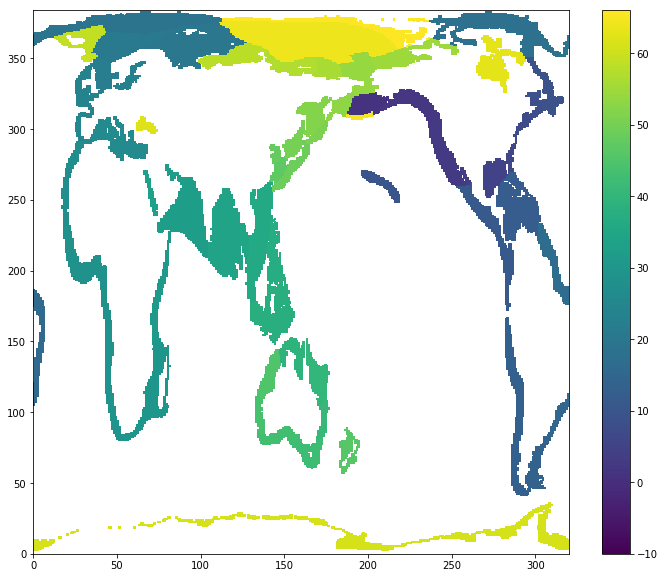

In [85]:


#mask[mask <=0] = -100
mask = np.ma.masked_where(np.ma.getmask(sst),mask)
fig = plt.figure(figsize=(12,10), facecolor = 'w')
plt.pcolormesh(mask, vmin = -10)
plt.colorbar()


In [77]:
lon = mydata.variables['TLONG'][:]
lat = mydata.variables['TLAT'][:]
##################
# manipulate data to plot
# make longitudes monotonically increasing
lon = np.where(np.greater_equal(lon,min(lon[:,0])),lon-360,lon)

# stack grids side-by-side (in longitudinal direction), so
# any range of longitudes may be plotted on a world map
lon = np.concatenate((lon,lon+360),1)
lat = np.concatenate((lat,lat),1)
lon = lon - 360
lon.max()

320.20672770545798

In [79]:
mask[mask <=0] = np.NAN

In [95]:
#Change default line widths and font sizes
import matplotlib as mpl

In [113]:
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['patch.linewidth']= 2.0
# above didn't do it
mpl.rcParams['lines.linewidth']= 2.0


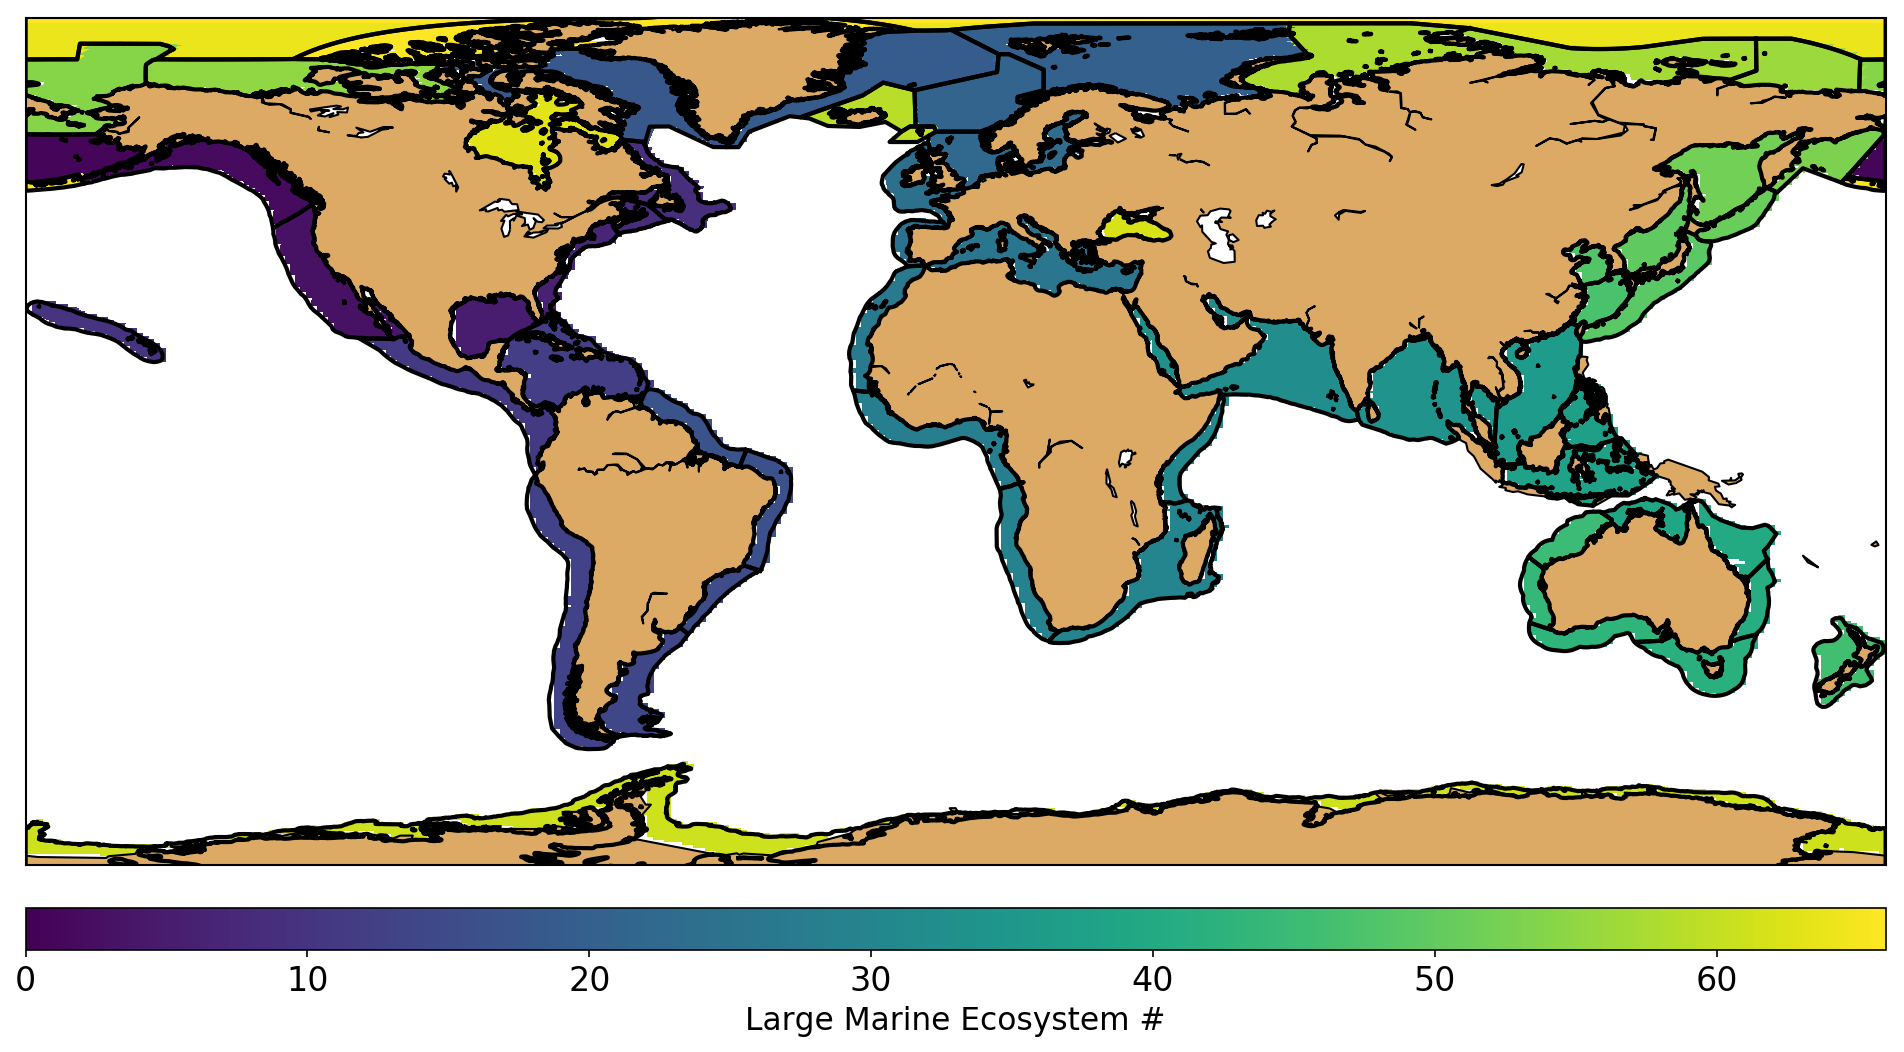

In [115]:
# plot in basemap with LME boundaries
var = mask
temp = np.ma.concatenate((var,var),1)


ax = plt.figure(figsize=(16,20), facecolor = 'w')

# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180


#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents(color='#ddaa66')

x, y = m(lon,lat)
im1 = m.pcolormesh(x,y,temp,vmin = 0)
cbar = m.colorbar(im1,location='bottom',pad="5%")
cbar.set_label('Large Marine Ecosystem #', fontsize=15)

m.readshapefile('LME66/LMEs66', 'LME') # the second argment is a name for the shapefile data
for info, shape in zip(m.LME_info, m.LME):
        x, y = zip(*shape) 
        m.plot(x, y, marker=None,color='k', linewidth = '2')       
plt.show()



In [128]:
# write mask to netcdf file


# save the array above to a netcdf file
ncdata = nc.Dataset("LME_x1_mask.nc", 'w', clobber=True)
# create dimensions
ncdata.createDimension('nlat', 384)
ncdata.createDimension('nlon',320)
# create variable
lmask = ncdata.createVariable('LME_MASK','f4',('nlat','nlon'))
lmask[:] = mask[:]
ncdata.close()

# checked, looks good

In [134]:
# now calculate area weighted SST mean for each LME

# use mask from above
cdata = nc.Dataset("LME_x1_mask.nc", 'r')
cmask = cdata.variables['LME_MASK'][:]

# get tarea and SST
myfile = 'mean.nday1.nc'
mydata = nc.Dataset(myfile,'r')
sst = mydata.variables['SST'][0,:,:]
tarea = mydata.variables['TAREA'][:]    

(384, 320) (384, 320)


In [143]:
# initialize mean sst array
sst_lme = np.zeros([66])
sst_lme[:] = -1

# loop over LMEs
for lme in range(1,66+1):
    # calculate mean sst in LME
     sst_lme[lme-1] = np.ma.average(sst[mask == lme], weights = tarea[mask == lme])
     

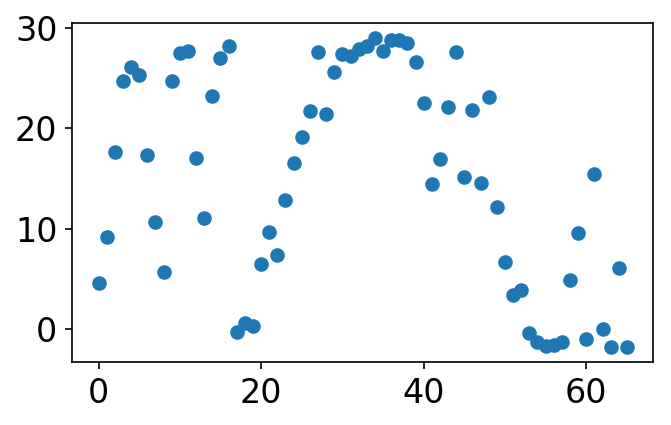

In [151]:
mpl.rcParams['figure.figsize'] = [5.0, 3.0]
plt.plot(sst_lme,'o')

In [171]:
# make an new array with the mean SST value in each LME

mean_sst_lme = np.copy(cmask)

# loop over LMEs
for lme in range(1,66+1):
    # assign mean sst to that lme
    mean_sst_lme[cmask == lme] = sst_lme[lme-1]

mean_sst_lme = np.ma.masked_where(np.ma.getmask(sst),mean_sst_lme)

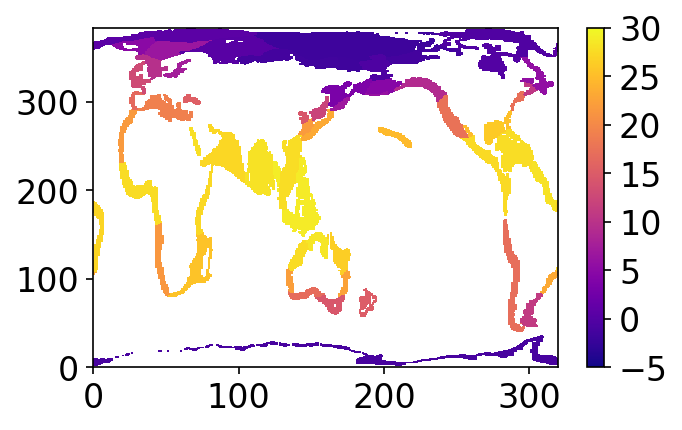

In [175]:
plt.pcolormesh(mean_sst_lme, vmin = -5, vmax = 30, cmap = 'plasma')
plt.colorbar()

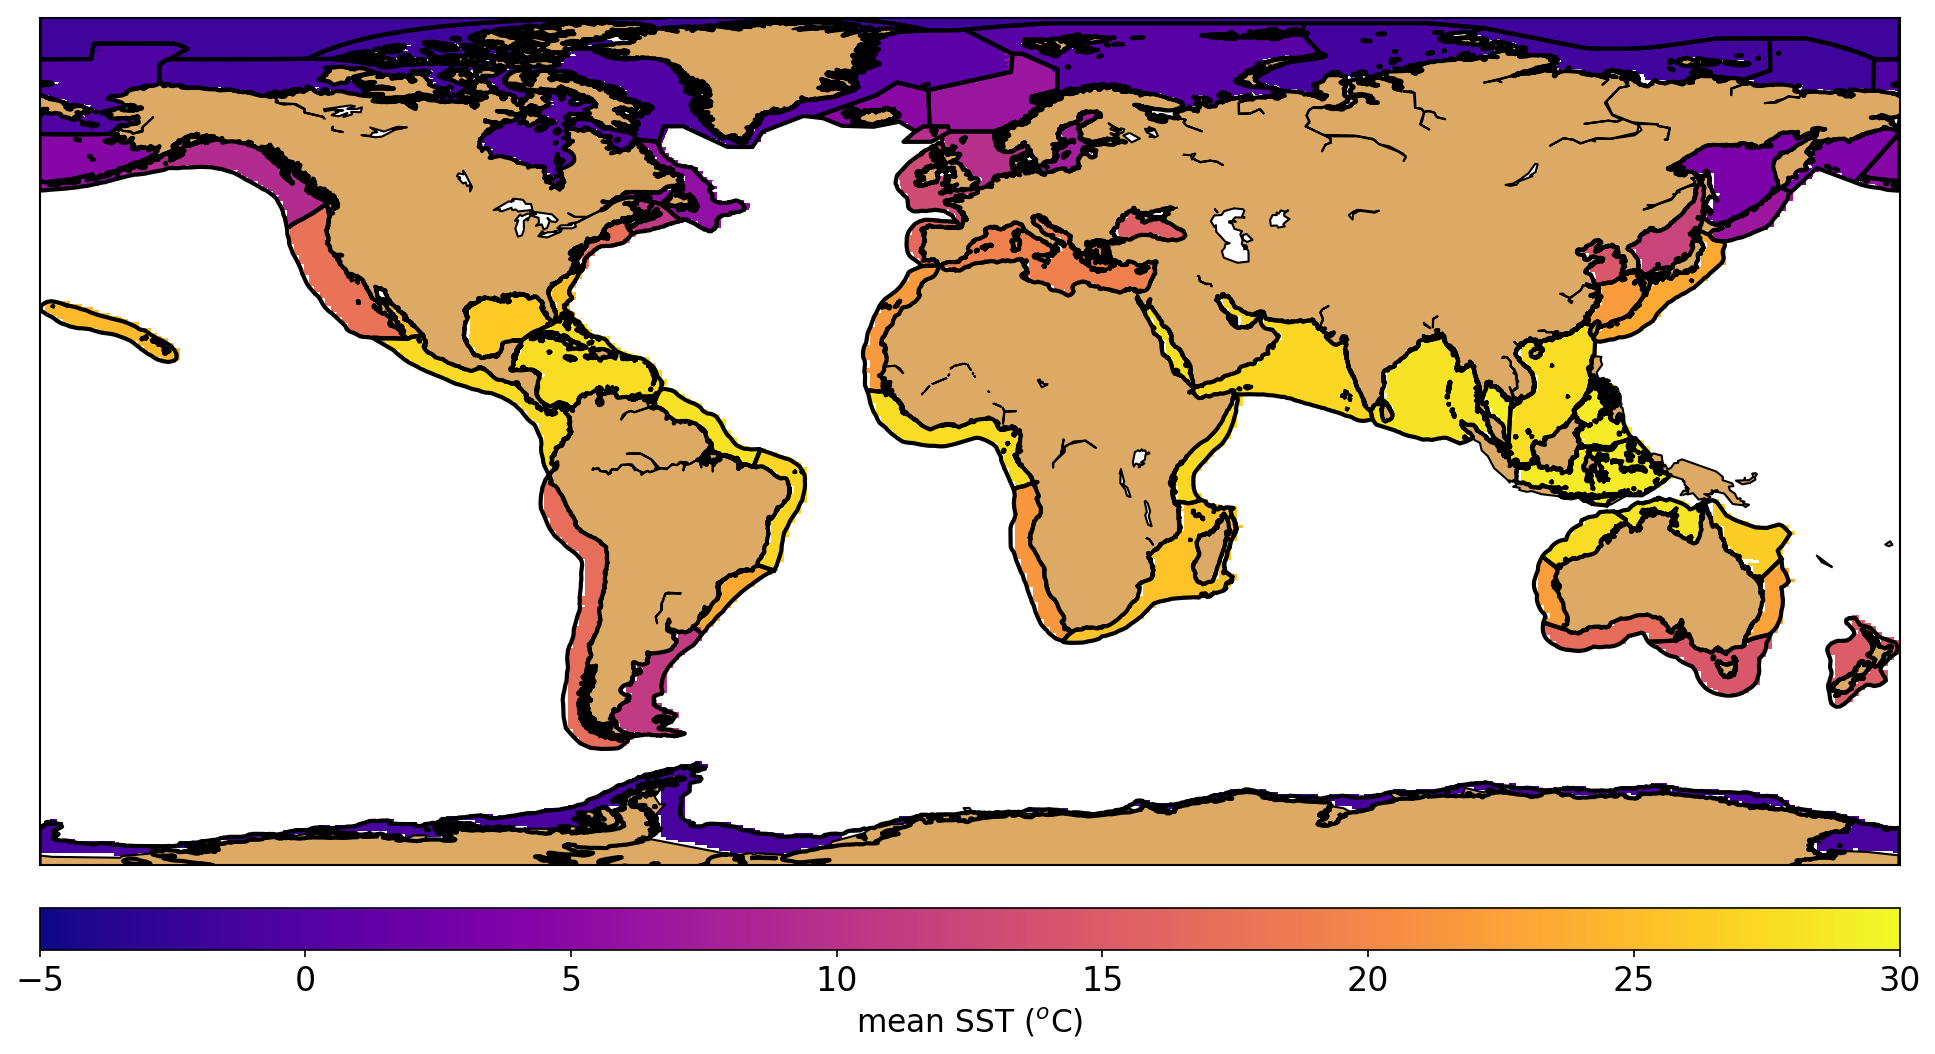

In [181]:
# plot in basemap with LME boundaries
var =mean_sst_lme 
temp = np.ma.concatenate((var,var),1)


ax = plt.figure(figsize=(16,20), facecolor = 'w')

# limits of plot
limN, limS, limE, limW = 84.,-80.,180,-180


#m = Basemap(projection='hammer',lon_0=0)
m = Basemap(projection='cyl', llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='c')
m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents(color='#ddaa66')

x, y = m(lon,lat)
im1 = m.pcolormesh(x,y,temp,vmin = -5, vmax = 30, cmap = 'plasma')
cbar = m.colorbar(im1,location='bottom',pad="5%")
cbar.set_label('mean SST ($^o$C)', fontsize=15)

m.readshapefile('LME66/LMEs66', 'LME') # the second argment is a name for the shapefile data
for info, shape in zip(m.LME_info, m.LME):
        x, y = zip(*shape) 
        m.plot(x, y, marker=None,color='k', linewidth = '2')       
# plt.show()



# Scratch

In [214]:
count_total = 0

for index in range(0,66):
    ft = lyr.GetFeature(index)
    print "Found polygon:  LME ", ft.items()['LME_NUMBER'], '  ',  ft.items()['LME_NAME']
    geom = ft.GetGeometryRef()
    print geom.GetGeometryCount()
    count_total += geom.GetGeometryCount()
    
print count_total
# 1263 total for the 66 LMEs, not the same as what was found above

Found polygon:  LME  23.0    Baltic Sea
30
Found polygon:  LME  52.0    Sea of Okhotsk
7
Found polygon:  LME  22.0    North Sea
37
Found polygon:  LME  2.0    Gulf of Alaska
107
Found polygon:  LME  9.0    Labrador - Newfoundland
2
Found polygon:  LME  24.0    Celtic-Biscay Shelf
23
Found polygon:  LME  50.0    Sea of Japan
7
Found polygon:  LME  51.0    Oyashio Current
9
Found polygon:  LME  8.0    Scotian Shelf
6
Found polygon:  LME  3.0    California Current
10
Found polygon:  LME  62.0    Black Sea
1
Found polygon:  LME  7.0    Northeast U.S. Continental Shelf
8
Found polygon:  LME  26.0    Mediterranean Sea
55
Found polygon:  LME  25.0    Iberian Coastal
1
Found polygon:  LME  49.0    Kuroshio Current
13
Found polygon:  LME  48.0    Yellow Sea
4
Found polygon:  LME  27.0    Canary Current
8
Found polygon:  LME  47.0    East China Sea
17
Found polygon:  LME  6.0    Southeast U.S. Continental Shelf
5
Found polygon:  LME  4.0    Gulf of California
6
Found polygon:  LME  5.0    Gulf o